<a href="https://colab.research.google.com/github/buiduongthuytien/GifHub/blob/master/Face_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cascade classifier xml file already existed



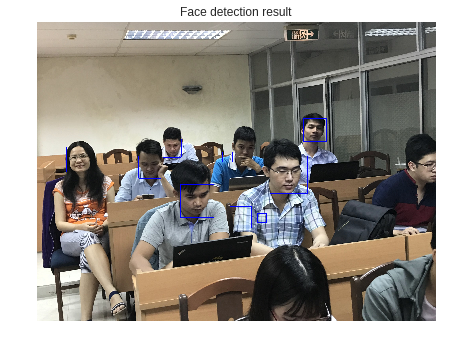

In [20]:
#import packages
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2

#Ham doc file img
def url2image(url):
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()),dtype = 'uint8')
    image = cv2.imdecode(image,cv2.IMREAD_COLOR)

    return image

import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

import os.path


bgr_img = url2image('https://raw.githubusercontent.com/buiduongthuytien/GifHub/84b95072b23a0cecb01f53eb1685f2e6dc6a97f0/IMG_5331.jpg')

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

face_classifier_xml = 'haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classifier_xml)

if ret:
    print('The cascade classifier xml file already existed\n')
else:
    print('Downloadling the cascade classifier xml file from internet ...\n')
    face_classifier_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
    resp = urlopen(face_classifier_url)
    data = resp.read()
    
    fh = open(face_classifier_xml,"wb")
    fh.write(data)
    fh.close()
    resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml)

faces = face_cascade.detectMultiScale(gray_img,1.25,3)
for (x,y,w,h) in faces:
    cv2.rectangle(bgr_img,(x,y),(x+w,y+h), (255,0,0),4)
plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
import cv2
import sys
import os
import numpy as np
from skimage import io


temp = io.imread('https://raw.githubusercontent.com/buiduongthuytien/GifHub/84b95072b23a0cecb01f53eb1685f2e6dc6a97f0/IMG_5331.jpg')

cv2.imwrite('IMG_5331.jpg',temp)

class FaceCropper(object):
    CASCADE_PATH = "haarcascade_frontalface_default.xml"

    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(self.CASCADE_PATH)

    def generate(self, image_path, show_result):
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(img, 1.1, 3, minSize=(100, 100))
        if (faces is None):
            print('Failed to detect face')
            return 0

        if (show_result):
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)
        i = 0
        height, width = img.shape[:2]

        for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)

            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (32, 32))
            i += 1
            cv2.imwrite("image%d.jpg" % i, lastimg)

if __name__ == '__main__':
    args = sys.argv
    argc = len(args)

    if (argc != 2):
        print('Usage: %s [image file]' % args[0])
        quit()

    detecter = FaceCropper()
    #detecter.generate(args[1], True)

Usage: /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py [image file]
